# Ciencia de Datos

## CIDE - David Guzmán

### Regresión logística y árboles de decisión

Para este notebook vamos a usar una base de datos sobre características asociadas al infarto al corazon

La base se encuentra en kaggle 

https://www.kaggle.com/fedesoriano/stroke-prediction-dataset

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv("healthcare-dataset-stroke-data.csv")

1. La base de datos tiene información categoríca. El primer paso es convertirla en una base de datos con variables dummies por cada categoría. En la clase hicimos esto muy artesanalmente, pero tú puedes usar la función get_dummies de pandas. Si se logra debería quedar una matriz de 5110x23

2. Gráficar las distribuciones de las variables continuas para cuando la variable dependiente "stroke" es 1 y es 0. ¿Existe alguna variable que separe mejor ambas clases? ¿Cuál estadístico usarías para medir esa separación?

3. Para este ejercicio, sólo considero las variables continuas. Voy a tomar una variable continua de mi preferencia. Haciendo modelos de una sola variable cuál sería la precision, recall y accuracy para los diferentes thresholds de esta variable. La idea es ver cómo se ven estas 3 medidas para distintos thresholds, algo parecido a lo que hicimos aquí

![fig](figura1.png)

4. Aplica un modelo de regresión logística, cuál es el AUC del modelo? Cómo se ve la curva ROC? ¿Cómo se ve la accuracy, el precision y el recall?

5. ¿Aplica alguna técnica de subsampleo y sobresampleo para ver si esto ayuda a mejorar el score, ¿cómo se ve?

6. ¿Existe alguna transformación que puedas aplicar a la matriz de regresores para mejorar el modelo?

La base de datos tiene información categoríca. Tu primer paso es convertirla en una base de datos con variables dummies por cada categoría. En la clase hicimos esto muy artesanalmente, pero tú puedes usar la función get_dummies de pandas. Si lo logras te debería quedar una matriz de 5110x23

In [ ]:
df_transformed = pd.get_dummies(df)
df_transformed.shape

(5110, 23)

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df_transformed

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,NaN,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,NaN,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0
5108,37544,51.0,0,0,166.29,25.6,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0


Gráfica las distribuciones de las variables continuas para cuando la variable dependiente "stroke" es 1 y es 0. ¿Existe alguna variable que separe mejor ambas clases? ¿Cuál estadístico usarías para medir esa separación?

In [ ]:
df_transformed.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [ ]:
df_transformed.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000,5110.000000,5110.000000,...,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,0.585910,0.413894,0.000196,...,0.004305,0.572407,0.160274,0.134442,0.491977,0.508023,0.302153,0.173190,0.370254,0.154403
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320,0.492612,0.492578,0.013989,...,0.065480,0.494778,0.366896,0.341160,0.499985,0.499985,0.459236,0.378448,0.482920,0.361370
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
continuous_variables = ['age', 'avg_glucose_level', 'bmi']

<Figure size 432x288 with 0 Axes>

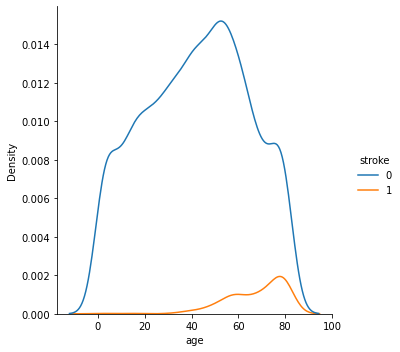

<Figure size 432x288 with 0 Axes>

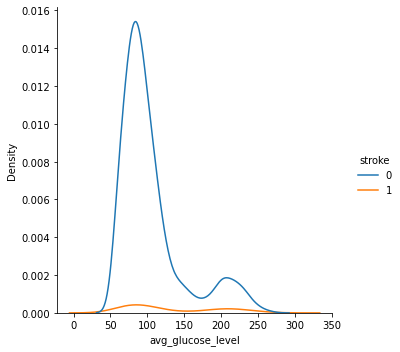

<Figure size 432x288 with 0 Axes>

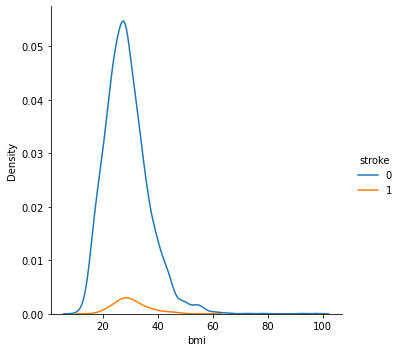

In [ ]:
from scipy import stats
import seaborn as sns

ks_test = []
for i in continuous_variables:
    no_stroke = df_transformed.loc[(df_transformed.stroke == 0), i].dropna()
    stroke = df_transformed.loc[(df_transformed.stroke == 1), i].dropna()
    plt.figure()
    sns.displot(data=df_transformed[[i, "stroke"]], x = i, kind="kde", hue = "stroke")
    ks = stats.kstest(no_stroke, stroke)
    mw = stats.mannwhitneyu(no_stroke, stroke)
    ks_test.append([i, ks, mw])
    

In [ ]:
ks_test

[['age',
  KstestResult(statistic=0.5408500903428567, pvalue=1.4432899320127035e-15),
  MannwhitneyuResult(statistic=200263.5, pvalue=3.726634665900011e-71)],
 ['avg_glucose_level',
  KstestResult(statistic=0.24016989579383158, pvalue=1.6678880498943727e-12),
  MannwhitneyuResult(statistic=471239.0, pvalue=3.6403672710893236e-09)],
 ['bmi',
  KstestResult(statistic=0.1697953781940344, pvalue=1.6329898250178054e-05),
  MannwhitneyuResult(statistic=413278.5, pvalue=0.00010264290844688746)]]

Para este ejercicio, sólo considera las variables continuas. Toma una variable continua de tu preferencia. Haciendo modelos de una sola variable cuál sería el precision, recall y accuracy para los diferentes thresholds de esta variable. La idea es ver cómo se ven estas 3 medidas para distintos thresholds, algo parecido a lo que hicimos aquí

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score



(array([3.700e+01, 3.730e+02, 7.350e+02, 1.151e+03, 1.053e+03, 6.630e+02,
        3.480e+02, 1.970e+02, 6.100e+01, 3.800e+01, 3.000e+01, 6.000e+00,
        4.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([10.3  , 14.665, 19.03 , 23.395, 27.76 , 32.125, 36.49 , 40.855,
        45.22 , 49.585, 53.95 , 58.315, 62.68 , 67.045, 71.41 , 75.775,
        80.14 , 84.505, 88.87 , 93.235, 97.6  ]),
 <BarContainer object of 20 artists>)

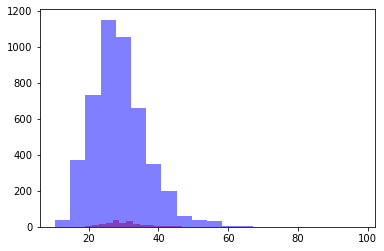

In [ ]:
plt.hist(stroke,bins=20,color="r", alpha = .5)
plt.hist(no_stroke,bins=20,color="blue", alpha = .5)

In [ ]:
thresholds = np.arange(0,105, 5)

In [ ]:
def model(x,threshold):
    model_map = {True:1,False:0}
    result = x<threshold
    result = np.vectorize(model_map.get)(result)
    return result

In [ ]:
distribution = np.concatenate([stroke,no_stroke])
classes = np.concatenate([[1]*len(stroke),[0]*len(no_stroke)])

In [ ]:
results = pd.DataFrame(columns = ["threshold", "precision", "recall", "accuracy"])
for i in thresholds:
    prediction = model(distribution, i)
    precision = precision_score(classes, prediction)
    accuracy = accuracy_score(classes, prediction)
    recall = recall_score(classes, prediction)
    results = pd.concat([results, pd.DataFrame({"threshold": i, 
                                              "precision": precision,
                                              "recall": recall, 
                                              "accuracy": accuracy}, index=[0])], ignore_index = True)
    

In [ ]:
results

,threshold,precision,recall,accuracy
0,0,0.000000,0.000000,0.957425
1,5,0.000000,0.000000,0.957425
2,10,0.000000,0.000000,0.957425
3,15,0.000000,0.000000,0.948869
4,20,0.005769,0.014354,0.852719
5,25,0.022785,0.172249,0.650234
6,30,0.037136,0.531100,0.393767
7,35,0.041865,0.799043,0.212874
8,40,0.042269,0.909091,0.119169
9,45,0.042325,0.961722,0.071909


Aplica un modelo de regresión logística, cuál es el AUC del modelo? Cómo se ve la curva ROC? ¿Cómo se ve la accuracy, el precision y el recall?

In [ ]:
df_transformed = df_transformed.dropna()
X = df_transformed.drop(["id", "stroke"], axis = 1)
y = df_transformed.stroke

In [ ]:
X_reduced = X[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 
       'Residence_type_Rural', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_unscaled = LogisticRegression()
LR_unscaled = LR_unscaled.fit(X_train, y_train)
y_test_unscaled_pred = LR_unscaled.predict(X_test)

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

normalized_X_train = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns = X_train.columns
)

LR = LogisticRegression().fit(normalized_X_train, y_train)

normalized_X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)
y_test_pred = LR.predict(normalized_X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
LR_unscaled = LogisticRegression(solver='lbfgs', max_iter=1000)
LR_unscaled = LR_unscaled.fit(X_train, y_train)
y_test_unscaled_pred = LR_unscaled.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred )
auc = roc_auc_score(y_test, y_test_pred )
accuracy = accuracy_score(y_test, y_test_pred )
precision = precision_score(y_test, y_test_pred )
recall = recall_score(y_test, y_test_pred )

auc, accuracy, precision, recall

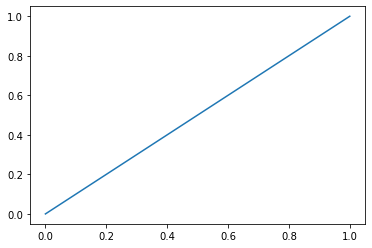

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,  y_test_unscaled_pred )
auc = roc_auc_score(y_test, y_test_unscaled_pred )
accuracy = accuracy_score(y_test, y_test_unscaled_pred)
precision = precision_score(y_test, y_test_unscaled_pred )
recall = recall_score(y_test, y_test_unscaled_pred )

auc, accuracy, precision, recall

¿Aplica alguna técnica de subsampleo y sobresampleo para ver si esto ayuda a mejorar el score, ¿cómo se ve?

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)


from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

normalized_X_train_smote = pd.DataFrame(
    scaler.fit_transform(X_smote),
    columns = X_smote.columns
)

LR = LogisticRegression().fit(normalized_X_train_smote, y_smote)

normalized_X_test = pd.DataFrame(
    scaler.transform(X_test),
    columns = X_test.columns
)
y_test_pred_smote = LR.predict(normalized_X_test)

In [ ]:
y_smote.value_counts()

0    3160
1    3160
Name: stroke, dtype: int64

In [ ]:
pd.Series(y_test_pred_smote).value_counts()

0    1474
1     146
dtype: int64

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_smote)
auc = roc_auc_score(y_test, y_test_pred_smote )
accuracy = accuracy_score(y_test, y_test_pred_smote)
precision = precision_score(y_test, y_test_pred_smote)
recall = recall_score(y_test, y_test_pred_smote)

auc, accuracy, precision, recall

(0.623538961038961, 0.8925925925925926, 0.1780821917808219, 0.325)

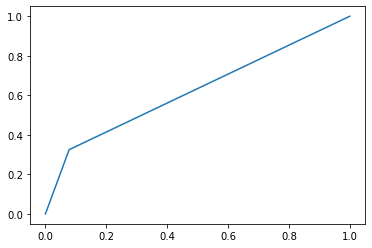

In [ ]:
plt.plot(fpr, tpr)

¿Existe alguna transformación que puedas aplicar a la matriz de regresores para mejorar el modelo?

In [ ]:
columns =  ["age", "bmi", "avg_glucose_level", "stroke"]
df[columns].corr()

,age,bmi,avg_glucose_level,stroke
age,1.000000,0.333398,0.238171,0.245257
bmi,0.333398,1.000000,0.175502,0.042374
avg_glucose_level,0.238171,0.175502,1.000000,0.131945
stroke,0.245257,0.042374,0.131945,1.000000


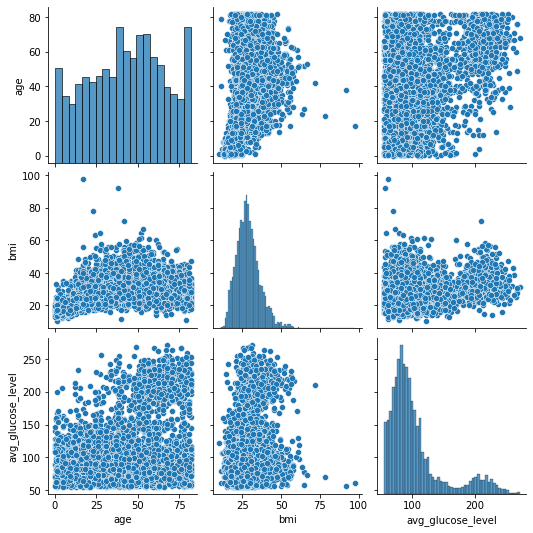

In [ ]:
columns = ["age", "bmi", "avg_glucose_level"]

sns.pairplot(X[columns])

In [ ]:
X_reduced

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,1,0,0,1,0,0,1,0,0
2,80.0,0,1,105.92,32.5,0,1,1,0,0,1,0,1,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,0,1,0,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,0,1,1,0,1,0
5,81.0,0,0,186.21,29.0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,1,0,0,0,0,0,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,1,0,1,0,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,1,0,1,0,0,0,1,1,0,1,0
5108,51.0,0,0,166.29,25.6,0,1,1,0,0,1,0,1,1,0,0


In [ ]:
X_reduced["bmi"] = np.log(X_reduced["bmi"])
X_reduced["avg_glucose_level"] = np.log(X_reduced["avg_glucose_level"]) 

/var/folders/mq/q8s4gj3j6930bhf495rt0l1m0000gp/T/ipykernel_29216/3892019709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reduced["bmi"] = np.log(X_reduced["bmi"])
/var/folders/mq/q8s4gj3j6930bhf495rt0l1m0000gp/T/ipykernel_29216/3892019709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reduced["avg_glucose_level"] = np.log(X_reduced["avg_glucose_level"])


In [ ]:
X_reduced.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Female', 'gender_Male', 'ever_married_Yes',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'Residence_type_Rural',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_reduced, y, test_size=0.33, random_state=42)

In [ ]:
X_train_2

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
4904,5.0,0,0,4.393585,3.210844,1,0,0,0,0,0,0,1,0,0,0
3617,48.0,0,0,4.734794,3.086487,0,1,1,0,0,1,0,1,0,1,0
5066,37.0,0,0,4.774153,3.222868,1,0,0,0,0,1,0,0,0,1,0
3343,9.0,0,0,4.123094,2.785011,0,1,0,0,0,0,0,1,0,0,0
3076,32.0,0,0,4.273884,3.277145,1,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,19.0,0,0,4.492001,3.095578,1,0,0,0,0,1,0,0,0,1,0
511,51.0,0,0,4.417997,3.391147,1,0,1,0,0,1,0,1,0,0,1
3247,53.0,0,0,4.507006,3.095578,1,0,1,0,0,1,0,1,1,0,0
3946,11.0,0,0,4.538068,3.034953,1,0,0,0,0,0,0,1,0,0,0


In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X_smote_2, y_smote_2 = oversample.fit_resample(X_train_2, y_train_2)


from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

normalized_X_train_smote_2 = pd.DataFrame(
    scaler.fit_transform(X_smote_2),
    columns = X_smote_2.columns
)

LR = LogisticRegression().fit(normalized_X_train_smote_2, y_smote_2)

normalized_X_test_2 = pd.DataFrame(
    scaler.transform(X_test_2),
    columns = X_test_2.columns
)
y_test_pred_smote_2 = LR.predict(normalized_X_test_2)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_2, y_test_pred_smote_2)
auc = roc_auc_score(y_test_2, y_test_pred_smote_2)
accuracy = accuracy_score(y_test_2, y_test_pred_smote_2)
precision = precision_score(y_test_2, y_test_pred_smote_2)
recall = recall_score(y_test_2, y_test_pred_smote_2)

auc, accuracy, precision, recall

(0.6675324675324675, 0.8635802469135803, 0.16901408450704225, 0.45)